In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow import keras
from keras.layers import Dense,Dropout
from keras.models import Sequential
import innvestigate
import innvestigate.utils as iutils
import seaborn as sns

In [2]:
variance_data = pd.read_csv(r'C:\Users\Shrinidhi\Desktop\Thesis\fpkm_top_3000_variance_genes.tsv', sep='\t', index_col=0)

# Create the model
model = Sequential()

X = variance_data.drop(columns=['cancer_status']).values

# Convert 'cancer_status' to binary labels 
y = variance_data['cancer_status'].apply(lambda x: 1 if x == 'cancer' else 0).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [3]:
print(variance_data.shape)  
print("Shape of X_train:", X_train.shape)  
print("Shape of X_test:", X_test.shape)    

print("Unique labels in y_train:", np.unique(y_train))  
print("Class distribution in y_train:", np.bincount(y_train))  #class balance

(19131, 3001)
Shape of X_train: (15304, 3000)
Shape of X_test: (3827, 3000)
Unique labels in y_train: [0 1]
Class distribution in y_train: [7681 7623]


In [4]:
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
# Build the model
model = Sequential()

# Add layers as per the architecture
model.add(Dense(500, input_dim=3000, activation='relu',kernel_regularizer=l2(0.01)))  
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))

# Output layer for binary classification (cancer vs. normal)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=100, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

# Make predictions and evaluate
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

Epoch 1/100
123/123 [==============================] - 4s 23ms/step - loss: 7.5286 - accuracy: 0.6017 - val_loss: 4.1833 - val_accuracy: 0.9232
Epoch 2/100
123/123 [==============================] - 3s 21ms/step - loss: 2.8800 - accuracy: 0.9117 - val_loss: 1.7598 - val_accuracy: 0.9575
Epoch 3/100
123/123 [==============================] - 3s 22ms/step - loss: 1.2848 - accuracy: 0.9470 - val_loss: 0.8059 - val_accuracy: 0.9608
Epoch 4/100
123/123 [==============================] - 2s 19ms/step - loss: 0.6211 - accuracy: 0.9551 - val_loss: 0.4275 - val_accuracy: 0.9618
Epoch 5/100
123/123 [==============================] - 2s 19ms/step - loss: 0.4046 - accuracy: 0.9377 - val_loss: 0.2632 - val_accuracy: 0.9637
Epoch 6/100
123/123 [==============================] - 2s 19ms/step - loss: 0.3119 - accuracy: 0.9274 - val_loss: 0.1904 - val_accuracy: 0.9647
Epoch 7/100
123/123 [==============================] - 3s 21ms/step - loss: 0.2282 - accuracy: 0.9398 - val_loss: 0.1654 - val_accuracy:

In [5]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary predictions

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

120/120 [==============================] - 0s 4ms/step - loss: 0.1184 - accuracy: 0.9697
Test Accuracy: 0.9696890711784363
120/120 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1921
           1       0.95      0.99      0.97      1906

    accuracy                           0.97      3827
   macro avg       0.97      0.97      0.97      3827
weighted avg       0.97      0.97      0.97      3827

[[1821  100]
 [  16 1890]]


In [6]:
# training accuracy
train_accuracy = history.history['accuracy'][-1]  # Accuracy at the last epoch
print(f"Final Training Accuracy: {train_accuracy}")

Final Training Accuracy: 0.9077840447425842


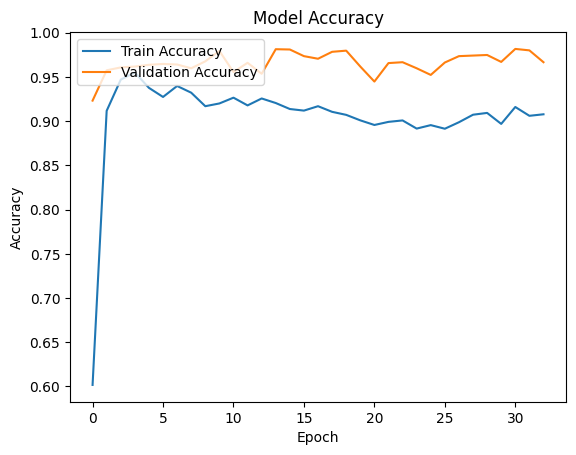

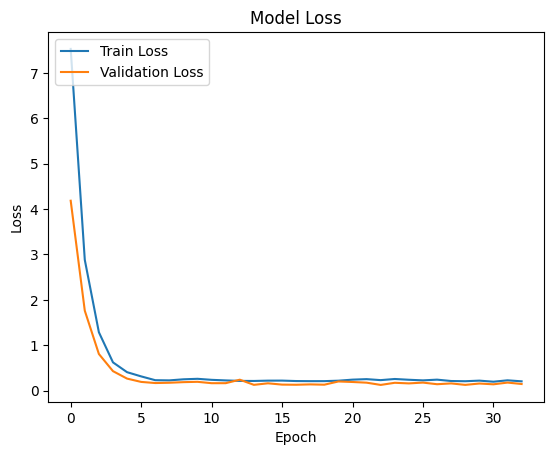

In [7]:
import matplotlib.pyplot as plt

# accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      1921
           1       0.95      0.99      0.97      1906

    accuracy                           0.97      3827
   macro avg       0.97      0.97      0.97      3827
weighted avg       0.97      0.97      0.97      3827



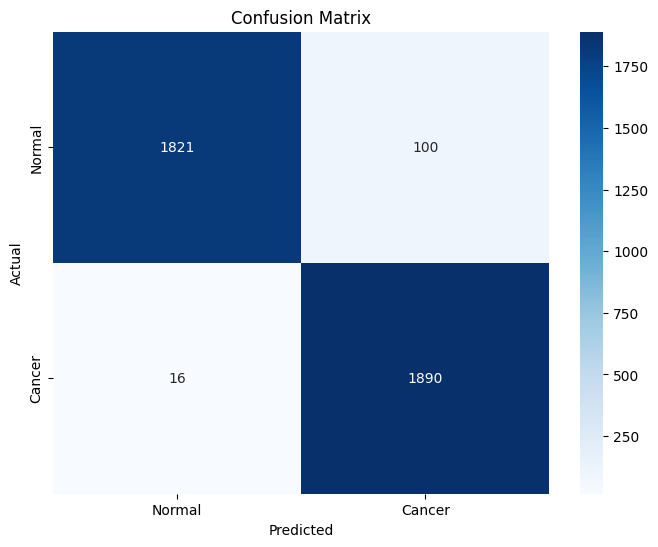

120/120 [==============================] - 0s 3ms/step


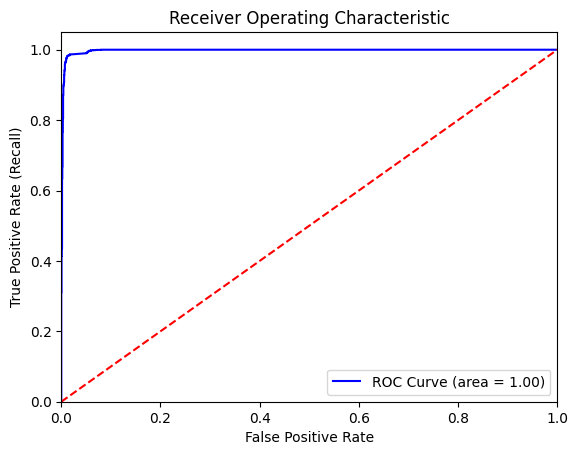

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Cancer'], yticklabels=['Normal', 'Cancer'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# 3. ROC Curve
y_pred_proba = model.predict(X_test).ravel()  # Get probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


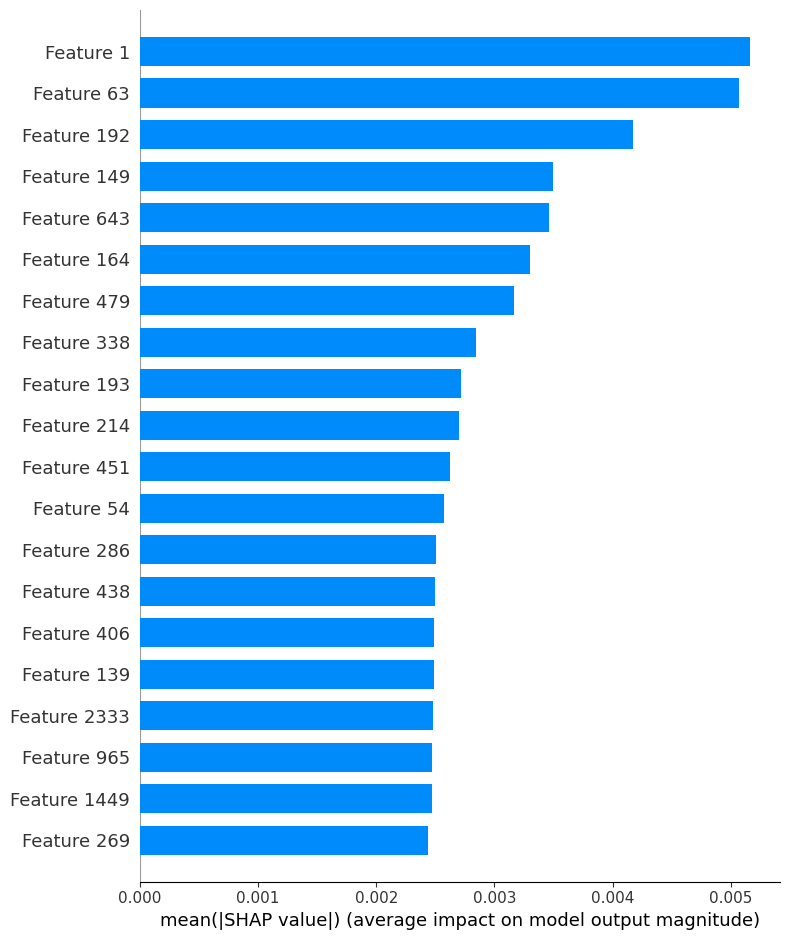

In [9]:
import numpy as np
import shap

batch_size = 500
num_samples = X_test.shape[0]
all_shap_values = []

# Loop through data in batches
for start in range(0, num_samples, batch_size):
    end = min(start + batch_size, num_samples)
    X_batch = X_test[start:end]
    
    # Initialize SHAP explainer 
    explainer = shap.DeepExplainer(model, X_batch)
    shap_values_batch = explainer.shap_values(X_batch)
    
    if isinstance(shap_values_batch, list):
        shap_values_batch = shap_values_batch[0]  

    all_shap_values.append(shap_values_batch)

shap_values_full = np.concatenate(all_shap_values, axis=0)
shap.summary_plot(shap_values_full, X_test, plot_type="bar")


Top 10 most important genes based on SHAP values:
['ENSG00000219928.2', 'ENSG00000170373.8', 'ENSG00000111245.14', 'ENSG00000100146.16', 'ENSG00000170369.3', 'ENSG00000268942.2', 'ENSG00000161634.11', 'ENSG00000168530.15', 'ENSG00000162840.4', 'ENSG00000240247.6']


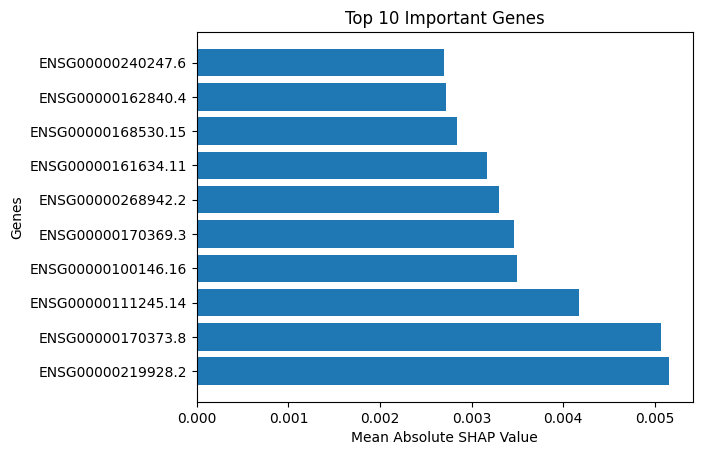

In [10]:
import numpy as np
import shap
import matplotlib.pyplot as plt


feature_names = variance_data.drop(columns=['cancer_status']).columns  # genes

# dict to store shap values and genes
shap_gene_mapping = {}

# Loop through the SHAP values and map them to gene names
for i, feature_name in enumerate(feature_names):
    shap_gene_mapping[feature_name] = shap_values_full[:, i]

# sort genes by their mean absolute SHAP value 
mean_abs_shap = np.abs(shap_values_full).mean(axis=0)
sorted_genes = np.argsort(mean_abs_shap)[::-1]  # sorted by importance


top_10_genes = [feature_names[i] for i in sorted_genes[:10]]
print("Top 10 most important genes based on SHAP values:")
print(top_10_genes)


# Plot 
plt.barh(top_10_genes, mean_abs_shap[sorted_genes[:10]])
plt.xlabel('Mean Absolute SHAP Value')
plt.ylabel('Genes')
plt.title('Top 10 Important Genes')
plt.show()


In [11]:
import pandas as pd
import numpy as np

# genes
genes = variance_data.drop(columns=['cancer_status']).columns

# Calculate the mean absolute SHAP value 
shap_importance = np.mean(np.abs(shap_values_full), axis=0)

# sort
top_n_genes_indices = np.argsort(shap_importance)[::-1]  
top_n_genes = genes[top_n_genes_indices][:10] 

print("Top 10 genes based on SHAP importance:")
for i, gene in enumerate(top_n_genes):
    print(f"{i+1}. {gene}, SHAP Importance: {shap_importance[top_n_genes_indices[i]]}")

# Canver status
top_genes_data = variance_data[top_n_genes]
cancer_status = variance_data['cancer_status']

# Concat
top_genes_with_status = pd.concat([top_genes_data, cancer_status], axis=1)
print("\nTop genes with cancer status:")
print(top_genes_with_status.head())


Top 10 genes based on SHAP importance:
1. ENSG00000219928.2, SHAP Importance: 0.0051556528174330225
2. ENSG00000170373.8, SHAP Importance: 0.005064764093064863
3. ENSG00000111245.14, SHAP Importance: 0.0041735142890630215
4. ENSG00000100146.16, SHAP Importance: 0.003496624311322819
5. ENSG00000170369.3, SHAP Importance: 0.0034626629405329246
6. ENSG00000268942.2, SHAP Importance: 0.0032959875787484847
7. ENSG00000161634.11, SHAP Importance: 0.003168023843287313
8. ENSG00000168530.15, SHAP Importance: 0.0028452215285611725
9. ENSG00000162840.4, SHAP Importance: 0.0027160659380104295
10. ENSG00000240247.6, SHAP Importance: 0.0026961476117570056

Top genes with cancer status:
                         ENSG00000219928.2  ENSG00000170373.8  \
GTEX-S4Q7-0003-SM-3NM8M             2.5462            -1.7809   
TCGA-19-1787-01                    -0.2845            -4.6082   
TCGA-S9-A7J2-01                     7.4066            -9.9658   
GTEX-QV31-1626-SM-2S1QC            -9.9658            -9.9

In [22]:
import pandas as pd
import numpy as np
genes = variance_data.drop(columns=['cancer_status']).columns

#calculate the mean absolute SHAP value
shap_importance = np.mean(np.abs(shap_values_full), axis=0)

#sort
top_n_genes_indices = np.argsort(shap_importance)[::-1]  


top_n_genes = genes[top_n_genes_indices][:100] 


print("Top 10 genes based on SHAP importance:")
for i, gene in enumerate(top_n_genes):
    print(f"{i+1}. {gene}, SHAP Importance: {shap_importance[top_n_genes_indices[i]]}")

#cancer status
top_genes_data = variance_data[top_n_genes]
cancer_status = variance_data['cancer_status']

#concat
top_genes_with_status = pd.concat([top_genes_data, cancer_status], axis=1)
print("\nTop genes with cancer status:")
print(top_genes_with_status.head())

Top 10 genes based on SHAP importance:
1. ENSG00000219928.2, SHAP Importance: 0.0051556528174330225
2. ENSG00000170373.8, SHAP Importance: 0.005064764093064863
3. ENSG00000111245.14, SHAP Importance: 0.0041735142890630215
4. ENSG00000100146.16, SHAP Importance: 0.003496624311322819
5. ENSG00000170369.3, SHAP Importance: 0.0034626629405329246
6. ENSG00000268942.2, SHAP Importance: 0.0032959875787484847
7. ENSG00000161634.11, SHAP Importance: 0.003168023843287313
8. ENSG00000168530.15, SHAP Importance: 0.0028452215285611725
9. ENSG00000162840.4, SHAP Importance: 0.0027160659380104295
10. ENSG00000240247.6, SHAP Importance: 0.0026961476117570056
11. ENSG00000181092.9, SHAP Importance: 0.0026226291014048823
12. ENSG00000262533.1, SHAP Importance: 0.0025724353739822224
13. ENSG00000259357.2, SHAP Importance: 0.002505502185995989
14. ENSG00000276026.1, SHAP Importance: 0.0024966943503572344
15. ENSG00000196611.4, SHAP Importance: 0.0024909531982313456
16. ENSG00000171401.14, SHAP Importance:

In [23]:
top_genes_with_status.to_csv("C://Users//Shrinidhi//Desktop//Thesis//Top 100 genes//DNN//top_100_genes_SHAP_var.csv", index=False)

In [12]:
import torch
import torch.nn as nn
import tensorflow as tf
import numpy as np

# Convert Keras model to PyTorch
class PyTorchModel(nn.Module):
    def __init__(self, keras_model):
        super(PyTorchModel, self).__init__()
        self.layers = []
        for layer in keras_model.layers:
            if isinstance(layer, tf.keras.layers.Dense):
                self.layers.append(nn.Linear(layer.input_shape[1], layer.units))
        self.model = nn.Sequential(*self.layers)

    def forward(self, x):
        return self.model(x)

assert "model" in locals(), "Keras model not found. Train your model first."

# Convert model to PyTorch
torch_model = PyTorchModel(model)
torch_model.eval()


PyTorchModel(
  (model): Sequential(
    (0): Linear(in_features=3000, out_features=500, bias=True)
    (1): Linear(in_features=500, out_features=500, bias=True)
    (2): Linear(in_features=500, out_features=200, bias=True)
    (3): Linear(in_features=200, out_features=300, bias=True)
    (4): Linear(in_features=300, out_features=200, bias=True)
    (5): Linear(in_features=200, out_features=100, bias=True)
    (6): Linear(in_features=100, out_features=1, bias=True)
  )
)

Input Tensor 0 did not already require gradients, required_grads has been set automatically.
Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished


Top 10 most important genes based on DeepLIFT values:
1: ENSG00000259392.2 (Mean Absolute DeepLIFT: 0.0110)
2: ENSG00000226580.1 (Mean Absolute DeepLIFT: 0.0094)
3: ENSG00000272600.1 (Mean Absolute DeepLIFT: 0.0091)
4: ENSG00000249001.5 (Mean Absolute DeepLIFT: 0.0090)
5: ENSG00000117598.11 (Mean Absolute DeepLIFT: 0.0085)
6: ENSG00000281044.1 (Mean Absolute DeepLIFT: 0.0082)
7: ENSG00000169509.5 (Mean Absolute DeepLIFT: 0.0082)
8: ENSG00000211804.3 (Mean Absolute DeepLIFT: 0.0081)
9: ENSG00000206838.1 (Mean Absolute DeepLIFT: 0.0079)
10: ENSG00000277985.1 (Mean Absolute DeepLIFT: 0.0079)


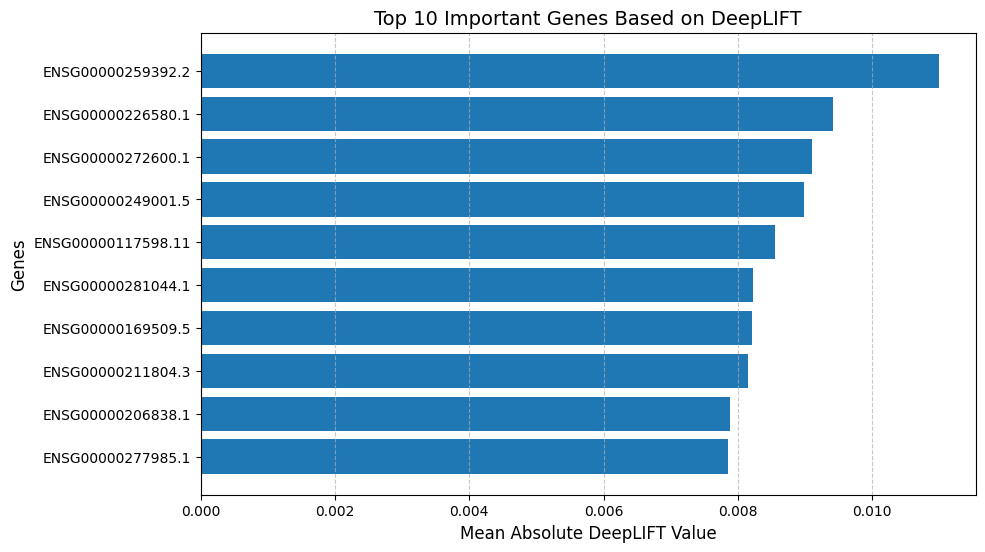

In [13]:
from captum.attr import DeepLift
from captum.attr import visualization as viz

# Convert test set to PyTorch tensor
X_test_torch = torch.tensor(X_test, dtype=torch.float32)

# Initialize DeepLIFT 
deeplift = DeepLift(torch_model)

# Compute DeepLIFT 
attributions = deeplift.attribute(X_test_torch, baselines=torch.zeros_like(X_test_torch))

# Convert to NumPy
attributions_np = attributions.detach().numpy()
feature_names = variance_data.drop(columns=['cancer_status']).columns

# Compute mean absolute DeepLIFT values
mean_abs_deeplift = np.abs(attributions_np).mean(axis=0)

# Sort genes 
sorted_indices = np.argsort(mean_abs_deeplift)[::-1]
top_10_genes = [feature_names[i] for i in sorted_indices[:10]]


print("Top 10 most important genes based on DeepLIFT values:")
for i, gene in enumerate(top_10_genes, 1):
    print(f"{i}: {gene} (Mean Absolute DeepLIFT: {mean_abs_deeplift[sorted_indices[i-1]]:.4f})")


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(top_10_genes[::-1], mean_abs_deeplift[sorted_indices[:10]][::-1])
plt.xlabel('Mean Absolute DeepLIFT Value', fontsize=12)
plt.ylabel('Genes', fontsize=12)
plt.title('Top 10 Important Genes Based on DeepLIFT', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [20]:
# Extract top 100 genes
top_100_genes = [feature_names[i] for i in sorted_indices[:100]]

print("\nTop 100 Most Important Genes Based on DeepLIFT Values:")
for i, gene in enumerate(top_100_genes, 1):
    print(f"{i}: {gene} (Mean Absolute DeepLIFT: {mean_abs_deeplift[sorted_indices[i-1]]:.4f})")

# Optional: Save to a file
top_100_df = pd.DataFrame({
    "Gene": top_100_genes,
    "Mean Absolute DeepLIFT": mean_abs_deeplift[sorted_indices[:100]]
})


Top 100 Most Important Genes Based on DeepLIFT Values:
1: ENSG00000259392.2 (Mean Absolute DeepLIFT: 0.0110)
2: ENSG00000226580.1 (Mean Absolute DeepLIFT: 0.0094)
3: ENSG00000272600.1 (Mean Absolute DeepLIFT: 0.0091)
4: ENSG00000249001.5 (Mean Absolute DeepLIFT: 0.0090)
5: ENSG00000117598.11 (Mean Absolute DeepLIFT: 0.0085)
6: ENSG00000281044.1 (Mean Absolute DeepLIFT: 0.0082)
7: ENSG00000169509.5 (Mean Absolute DeepLIFT: 0.0082)
8: ENSG00000211804.3 (Mean Absolute DeepLIFT: 0.0081)
9: ENSG00000206838.1 (Mean Absolute DeepLIFT: 0.0079)
10: ENSG00000277985.1 (Mean Absolute DeepLIFT: 0.0079)
11: ENSG00000201098.1 (Mean Absolute DeepLIFT: 0.0079)
12: ENSG00000261675.1 (Mean Absolute DeepLIFT: 0.0078)
13: ENSG00000268545.1 (Mean Absolute DeepLIFT: 0.0076)
14: ENSG00000244414.6 (Mean Absolute DeepLIFT: 0.0076)
15: ENSG00000164265.8 (Mean Absolute DeepLIFT: 0.0075)
16: ENSG00000279473.1 (Mean Absolute DeepLIFT: 0.0075)
17: ENSG00000223975.1 (Mean Absolute DeepLIFT: 0.0074)
18: ENSG000002784

In [ ]:
top_100_df.to_csv("C://Users//Shrinidhi//Desktop//Thesis//Top 100 genes//DNN//top_100_genes_deeplift_var.csv", index=False)

Top 100 genes saved to 'top_100_genes_deeplift.csv'.


In [14]:
import numpy as np
import lime
import lime.lime_tabular
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
feature_names = variance_data.drop(columns=['cancer_status']).columns.tolist()

# Initialize LIME
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train,  
    feature_names=feature_names,
    class_names=["Normal", "Cancer"],  # Labels for binary classification
    mode="classification"
)

In [16]:
def predict_fn(X):
    preds = model.predict(X)  # (N, 1)
    return np.hstack([1 - preds, preds])  # [P(Normal), P(Cancer)]

157/157 [==============================] - 1s 5ms/step


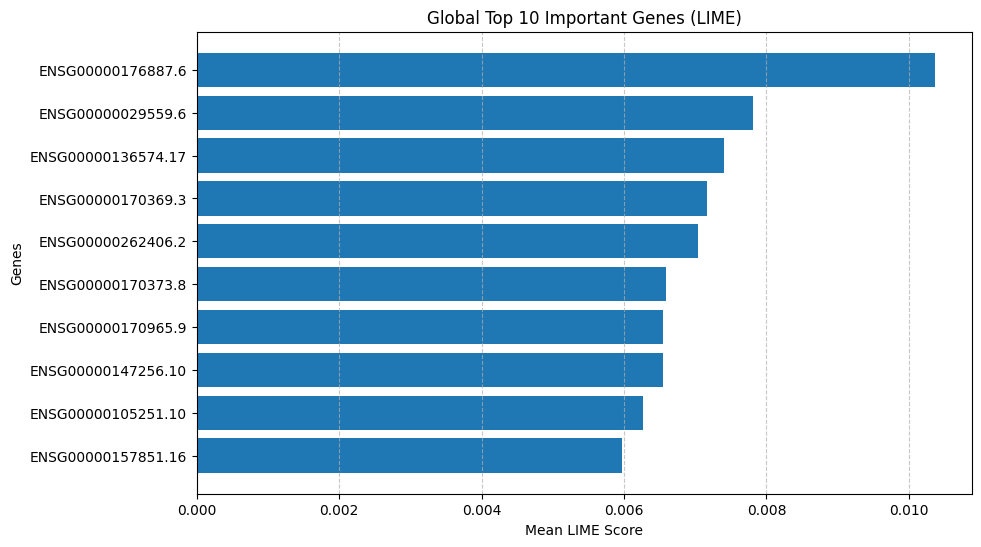

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Dict to store LIME genes
lime_scores = {gene: [] for gene in variance_data}

num_samples = len(X_test) 

for idx in range(num_samples):  
    sample = X_test[idx].reshape(1, -1)  # Get the sample
    explanation = explainer.explain_instance(sample.flatten(), predict_fn, num_features=len(feature_names)) 
    
    # Store feature importance values
    for feature, score in explanation.as_list():
        gene = feature.split()[0]  # Extract gene name 
        if gene in lime_scores:  
            lime_scores[gene].append(score)

# Compute mean importance scores across all samples
lime_avg_scores = {gene: np.mean(scores) for gene, scores in lime_scores.items() if scores} 


lime_df = pd.DataFrame(list(lime_avg_scores.items()), columns=["Gene", "Mean LIME Score"])
lime_df = lime_df.sort_values(by="Mean LIME Score", ascending=False)

# Plot the top 10 global important genes
plt.figure(figsize=(10, 6))
plt.barh(lime_df["Gene"].iloc[:10][::-1], lime_df["Mean LIME Score"].iloc[:10][::-1])  
plt.xlabel("Mean LIME Score")
plt.ylabel("Genes")
plt.title("Global Top 10 Important Genes (LIME)")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


In [18]:
# Print top 100 most important genes
top_100_genes = lime_df.head(100)
print("\nTop 100 Most Important Genes Based on LIME:")
print(top_100_genes)


Top 100 Most Important Genes Based on LIME:
                    Gene  Mean LIME Score
2982   ENSG00000176887.6         0.010364
2333   ENSG00000029559.6         0.007811
755   ENSG00000136574.17         0.007398
643    ENSG00000170369.3         0.007165
362    ENSG00000262406.2         0.007041
...                  ...              ...
844    ENSG00000123364.4         0.002691
1650   ENSG00000227640.2         0.002682
1467  ENSG00000165566.12         0.002660
1990   ENSG00000256980.4         0.002645
2490   ENSG00000260135.6         0.002607

[100 rows x 2 columns]


In [ ]:
top_100_genes.to_csv("C://Users//Shrinidhi//Desktop//Thesis//Top 100 genes//DNN//top_100_genes_lime_var.csv", index=False)

Top 100 genes saved to 'top_100_genes_lime.csv'.
